In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data/drinks.csv'
drinks = pd.read_csv(file_path) 

In [2]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [3]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [5]:
corr = drinks[["beer_servings","spirit_servings", "wine_servings"]].corr(method = "pearson")
print(corr)

                 beer_servings  spirit_servings  wine_servings
beer_servings         1.000000         0.458819       0.527172
spirit_servings       0.458819         1.000000       0.194797
wine_servings         0.527172         0.194797       1.000000


In [6]:
cols = ["beer_servings","spirit_servings", "wine_servings"]
corr = drinks[cols].corr(method = "pearson")
print(corr)

                 beer_servings  spirit_servings  wine_servings
beer_servings         1.000000         0.458819       0.527172
spirit_servings       0.458819         1.000000       0.194797
wine_servings         0.527172         0.194797       1.000000


In [7]:
!pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


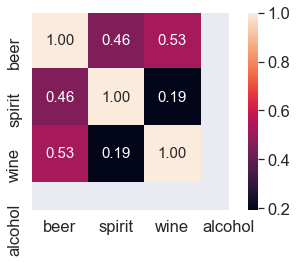

In [8]:
import seaborn as sns

cols_view = ["beer", "spirit", "wine", "alcohol"] # 그래프 출력을 위한 cols 이름을 축약
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
               cbar = True,
               annot = True,
               square = True,
               fmt = '.2f',
               annot_kws = {'size':15},
               yticklabels = cols_view,
               xticklabels = cols_view)

plt.tight_layout()
plt.show()

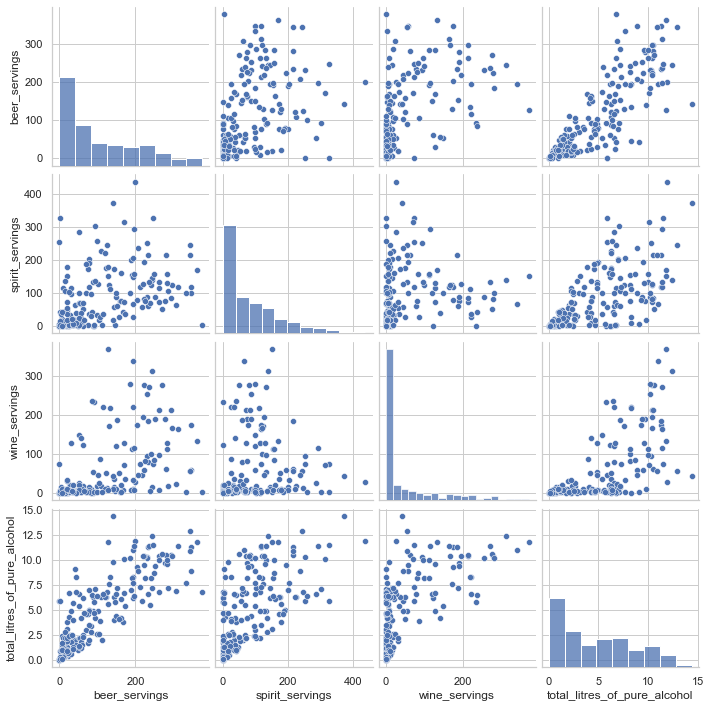

In [9]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

#### 두 그래프를 살펴보면 total_liitres_of_pure_alcohol 피처가 대체적으로 모든 피처와 상관관계가 있음.
#### beer_servings와의 상관성이 매우 높음.

## 탐색적 분석: 
1. 결측 데이터

In [15]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [16]:
drinks.info()
# continent에 결측치가 있는 것을 발견

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [18]:
drinks['continent'].isnull().count()

193

In [19]:
#여기서 결측치에 대해 OT 처리 해주기 ==> OT = Others

In [22]:
drinks['continent'] = drinks['continent'].fillna("OT")
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [36]:
# 결측치에 대한 pie 함수 그려보기
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
print(labels)
print(fracs1)

explode = (0,0,0,0.25, 0, 0) # 몇번째를 튀어나오게 만드는지 파라미터?

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


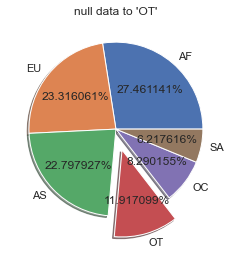

In [37]:
plt.pie(fracs1, explode = explode, labels = labels, autopct = '%0f%%', shadow = True)
plt.title('null data to \'OT\'')
plt.show()

In [39]:
#대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산한다.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [51]:
#전체 평균보다 알코올을 많이 섭취하는 대륙은?\
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_mean)
print(total_mean)
print('****************************************')
print(continent_over_mean)

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
4.717098445595855
****************************************
continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [52]:
#평균 beer serving이 가장 높은 대륙은?
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [62]:
beer_continent = drinks.groupby('continent')['beer_servings'].mean().idxmax() # 번외 idxmin 
print(beer_continent)

EU


## 분석 결과의 시각화

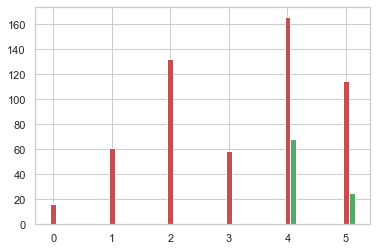

In [67]:
#대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')


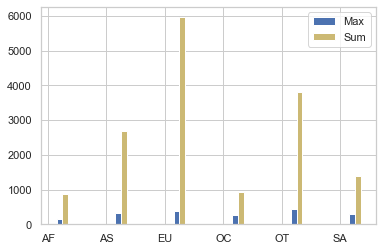

In [69]:
rects3 = plt.bar(index + bar_width *2, maxs, bar_width, color = 'b', label = 'Max')
rects3 = plt.bar(index + bar_width *3, sums, bar_width, color = 'y', label = 'Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()


Text(0.5, 1.0, 'toal_litres_of_pre_alcohol by Continent')

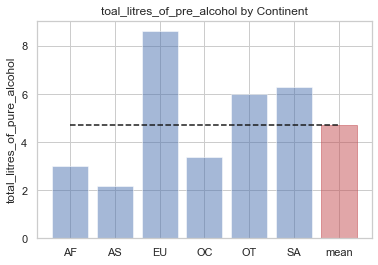

In [73]:
#대륙별 total_litres_of_pure_alchol을 시각화합니다.

continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents) -1].set_color('r')
plt.plot([0.,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('toal_litres_of_pre_alcohol by Continent')

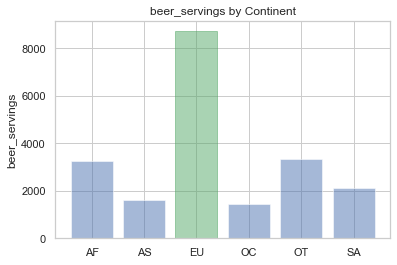

In [77]:
#대륙별 beer_servings 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[continents.index("EU")].set_color('g')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()


In [79]:
#아프리카와 유럽 간의 맥주 소비량 차이 검정하기

africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var = False)

print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f"% tTestResultDiffVar)

The t-statistic and p-value not assuming equal variances is -7.144 and 0.000


## 대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [84]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by = ['alcohol_rate'], ascending = 0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
